In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from vae_mnist import VariationalAutoEncoder, Session

In [3]:
import torch
from torch.autograd import Variable
from torchvision import datasets, transforms

In [4]:
EPOCHS = 20
BATCH_SIZE = 128

In [5]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True, transform=transforms.ToTensor()),
    batch_size=BATCH_SIZE, shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, download=True, transform=transforms.ToTensor()),
    batch_size=BATCH_SIZE, shuffle=True
)

Files already downloaded
Files already downloaded


In [6]:
vae = VariationalAutoEncoder(latent_n=2)
losses = []

with Session(vae, lr=1e-3, checkpoint_path="./model-checkpoint.pkl", load=False, save=True) as sess:
    for epoch in range(1):
        losses += sess.train(train_loader, epoch)
        print('epoch {} complete'.format(sess.epoch_number))
        
        sess.test(test_loader)
        break

epoch 1 complete
====> Test set loss: 1.3951
saving state_dict to ./model-checkpoint.pkl


In [7]:
with Session(vae, lr=1e-3, checkpoint_path="./model-checkpoint.pkl", load=True, save=True) as sess:
    for epoch in range(1, EPOCHS + 1):
        losses += sess.train(train_loader)
        print('epoch {} complete'.format(sess.epoch_number))
        
        sess.test(test_loader)

epoch 2 complete
====> Test set loss: 1.3488
epoch 3 complete
====> Test set loss: 1.3372
epoch 4 complete
====> Test set loss: 1.3324
epoch 5 complete
====> Test set loss: 1.3306
epoch 6 complete
====> Test set loss: 1.3260
epoch 7 complete
====> Test set loss: 1.3255
epoch 8 complete
====> Test set loss: 1.3236
epoch 9 complete
====> Test set loss: 1.3185
epoch 10 complete
====> Test set loss: 1.3178
epoch 11 complete
====> Test set loss: 1.3160
epoch 12 complete
====> Test set loss: 1.3139
epoch 13 complete
====> Test set loss: 1.3186
epoch 14 complete
====> Test set loss: 1.3160
epoch 15 complete
====> Test set loss: 1.3153
epoch 16 complete
====> Test set loss: 1.3142
epoch 17 complete
====> Test set loss: 1.3149
epoch 18 complete
====> Test set loss: 1.3118
epoch 19 complete
====> Test set loss: 1.3106
epoch 20 complete
====> Test set loss: 1.3111
epoch 21 complete
====> Test set loss: 1.3088
saving state_dict to ./model-checkpoint.pkl


## Now let's use the trained decoder to generate some digits

In [8]:
import matplotlib.pyplot as plt
import time

In [37]:
%matplotlib notebook

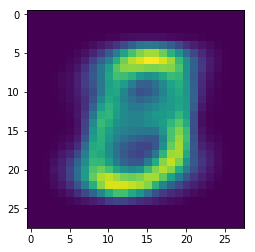

In [36]:
z = Variable(torch.randn(1, 2))

x = vae.decoder(z)

plt.imshow(x.view(28, 28).data.numpy())

<IPython.core.display.Javascript object>


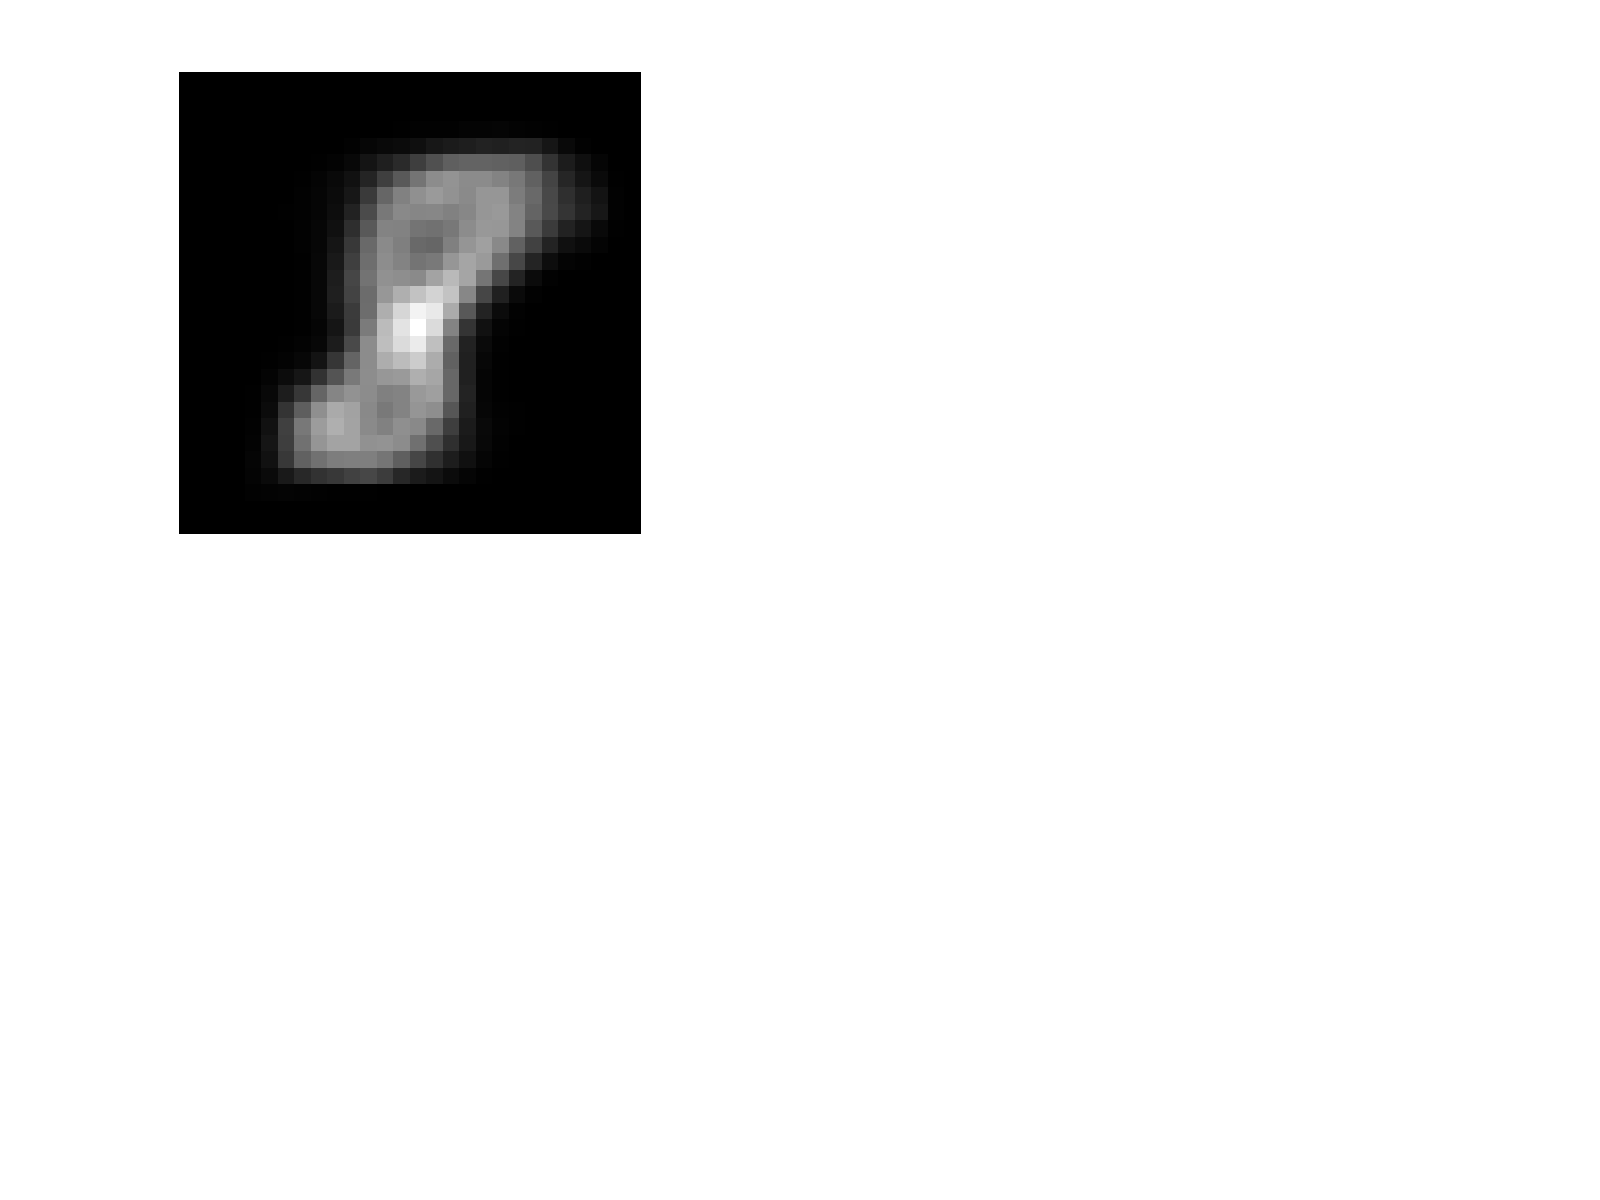

KeyboardInterrupt: 

In [38]:
fig = plt.figure(figsize=(8, 6))

for i in range(100):
    z = Variable(torch.randn(1, 2))
    x = vae.decoder(z)
    plt.imshow(x[0].view(28, 28).data.numpy(), cmap='gray')
    fig.canvas.draw()
    time.sleep(0.125)

In [39]:
%matplotlib inline

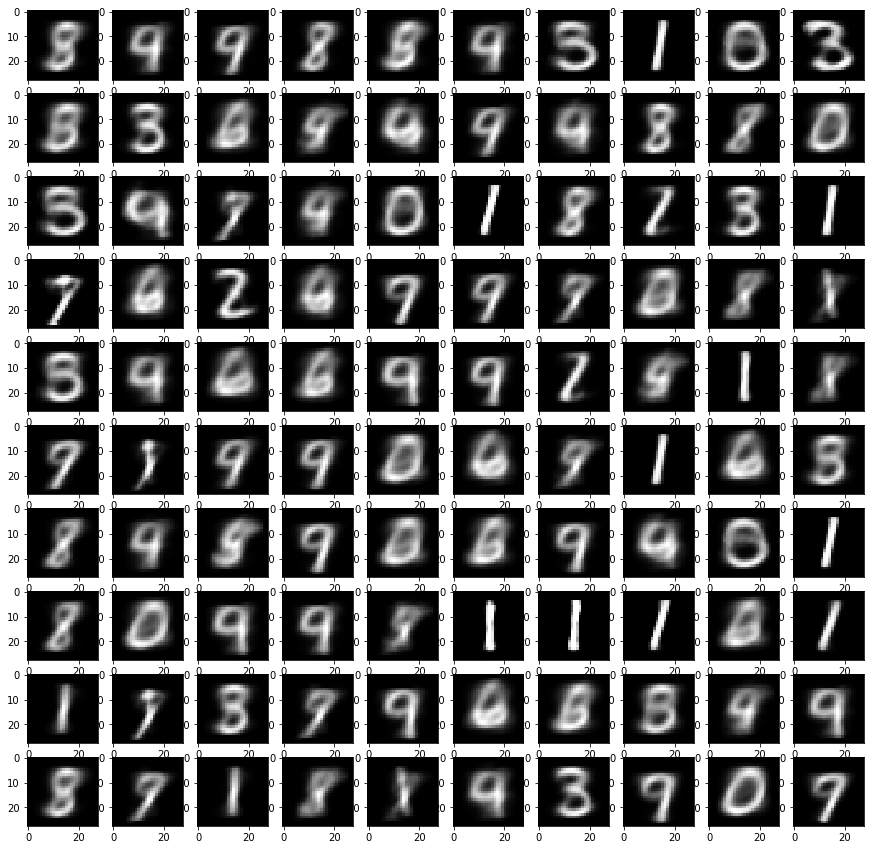

In [40]:
row, col = 10, 10
z = Variable(torch.randn(row*col, 2))
x = vae.decoder(z)

fig = plt.figure(figsize=(15, 15))
for n in range(row*col):
    plt.subplot(row, col, n + 1)
    plt.imshow(x[n].view(28, 28).data.numpy(), cmap="gray", aspect='auto')
    
plt.savefig('./figures/vae_minist.png', dpi=300, bbox_inches="tight")